In [1]:
# OBS_MMAX.IPYNB -- simulate empirical distribution over maximum mass from Alsing+ 1709.07889

In [2]:
import numpy as np # import packages
from numpy.random import normal

num_samps = int(2e4)

outfile = open("mmax_obs.csv","w") # record maximum masses
outfile.write("Mmax \n")

In [3]:
# best-fit population model with free Mmax from Alsing+ gives 2.12+0.09-0.12 at 68%CL (MAP); approximate as Gaussian plus uniform distribution
med = 2.12
std = 0.08
lb = 2.0
ub = 2.9
r1 = 0.70
cut = 1.97

In [4]:
mmax_dat = [] # sample from maximum mass distribution
for i in range(int(r1*num_samps)):
    mmax = 0
    while mmax < cut:
        mmax = np.random.normal(med,std)
    mmax_dat.append(mmax)
    outfile.write("{0} \n".format(mmax))
for i in range(num_samps - int(r1*num_samps)):
    mmax = (ub-lb)*np.random.random_sample()+lb
    mmax_dat.append(mmax)
    outfile.write("{0} \n".format(mmax))

In [5]:
def hpd_sample(dat,cl):

	dat = [datum for datum in dat if datum == datum]
	norm = len(dat)
	dat = np.array(dat)
	hist, bin_edges = np.histogram(dat,bins='sqrt')
	bins = [(bin_edges[i],bin_edges[i+1]) for i in range(len(bin_edges)-1)]
	hist_dat = zip(hist,bins)
	hist_dat.sort(reverse=True)
	hist, bins = zip(*hist_dat)
	hist = list(hist)
	bins = list(bins)
	
	for i in range(len(bins)):
		subdat = []
		for j in range(i+1):
			bin = bins[j]
			subdat.extend(dat[(dat >= bin[0]) & (dat < bin[1])])
		prob = float(len(list(subdat)))/norm
		if i == 0: maxap = 0.5*(min(subdat)+max(subdat))
		if prob >= cl: break
	
	lb, ub = min(subdat), max(subdat)

	return lb, maxap, ub

In [6]:
import matplotlib # make a plot of maximum mass distribution
from matplotlib import pyplot as plt
#import seaborn as sns

#cp = sns.color_palette('colorblind', 6)
matplotlib.rcParams['figure.figsize'] = (9.7082039325, 6.0)
matplotlib.rcParams['xtick.labelsize'] = 20.0
matplotlib.rcParams['ytick.labelsize'] = 20.0
matplotlib.rcParams['axes.labelsize'] = 25.0
matplotlib.rcParams['legend.fontsize'] = 17.0
matplotlib.rcParams['font.family']= 'Times New Roman'
matplotlib.rcParams['font.sans-serif']= ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['mathtext.fontset']= 'stixsans'

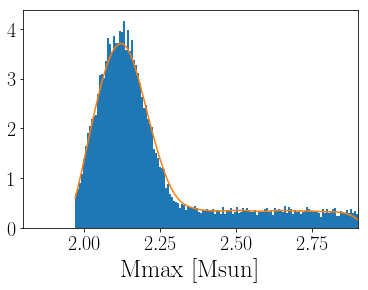

(2.00284361206073, 2.1304618818184924, 2.2319574030066036)
2.601206772677024


In [16]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(mmax_dat)

plt.hist(mmax_dat,bins=int(np.sqrt(num_samps)),density=True,histtype='stepfilled') # histogram of Mmax
plt.plot(np.linspace(1.97,2.9,100),kde(np.linspace(1.97,2.9,100)))

plt.xlabel('Mmax [Msun]')
plt.xlim(1.8,2.9)
plt.show()

print hpd_sample(mmax_dat,0.68) # 68%-credible HPD interval
print np.percentile(mmax_dat,90) # one-sided 90%-credible upper bound